In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='poster')

In [52]:
df=pd.read_excel('/home/suhananujum/Telecom customer Preprocessed Data.xlsx')
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.398608,0
1,1,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.948762,0
2,2,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-1.641883,1
3,3,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.983710,0
4,4,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-1.235224,1


Our aim is to do a supervised UMAP on this dataset


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [54]:
import umap

In [55]:
data=df.iloc[:,:-1]
data.head()


,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.398608
1,1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.948762
2,2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-1.641883
3,3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.983710
4,4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-1.235224


In [56]:

# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [57]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(data)
Scaled_data=scaling.transform(data)
 
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(7043, 3)


Text(0, 0.5, 'pc2')

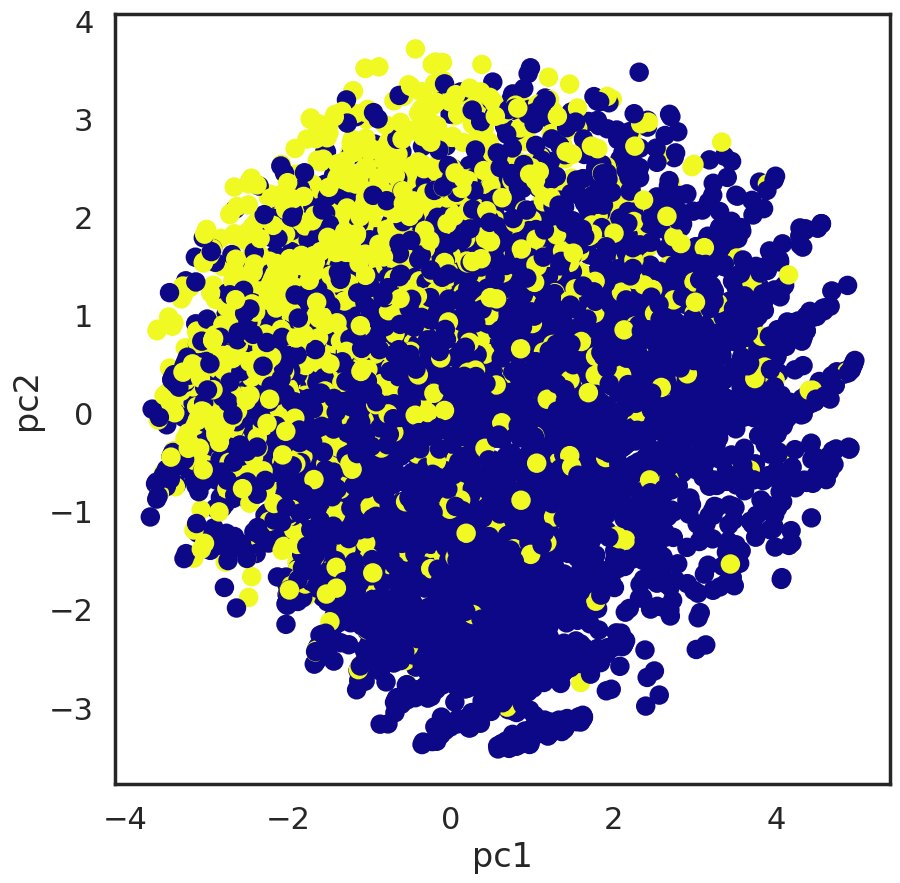

In [60]:

plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=target,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [59]:
target=df.iloc[:,-1]
target.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [8]:
target.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

0    5174
1    1869
Name: Churn, dtype: int64

There are 5174 people labelled 0 so for the time being we will assume that this was a low churn i.e these people renewed their subscriptions

In [9]:
classes = [
    '0',
    '1']

In [10]:
%%time
embedding = umap.UMAP(n_neighbors=10,min_dist=0.001,n_components=2).fit_transform(data)


CPU times: user 1min 34s, sys: 57.4 s, total: 2min 31s
Wall time: 57.2 s


In [11]:
embedding

array([[  9.831234 , -14.760454 ],
       [  9.830874 , -14.760328 ],
       [  9.831659 , -14.760776 ],
       ...,
       [  5.6868196, -10.645756 ],
       [  5.6847134, -10.647925 ],
       [  5.6858487, -10.646726 ]], dtype=float32)

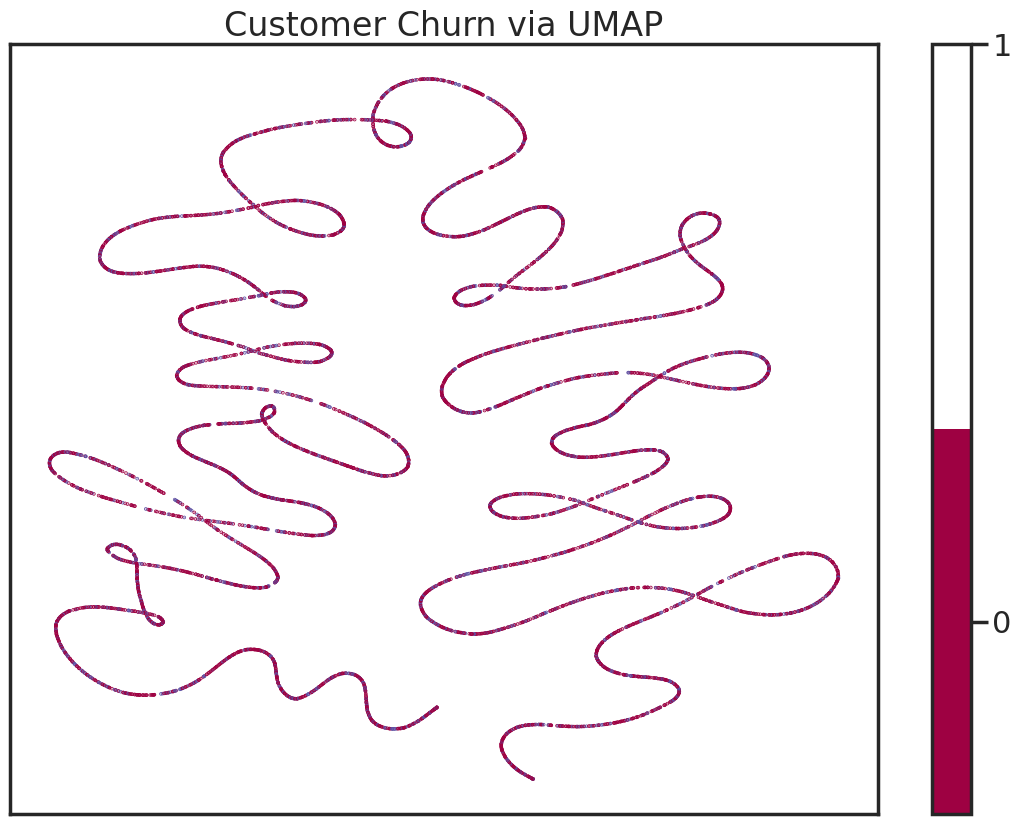

In [12]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(2)-0.5)
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(classes)
plt.title('Customer Churn via UMAP');

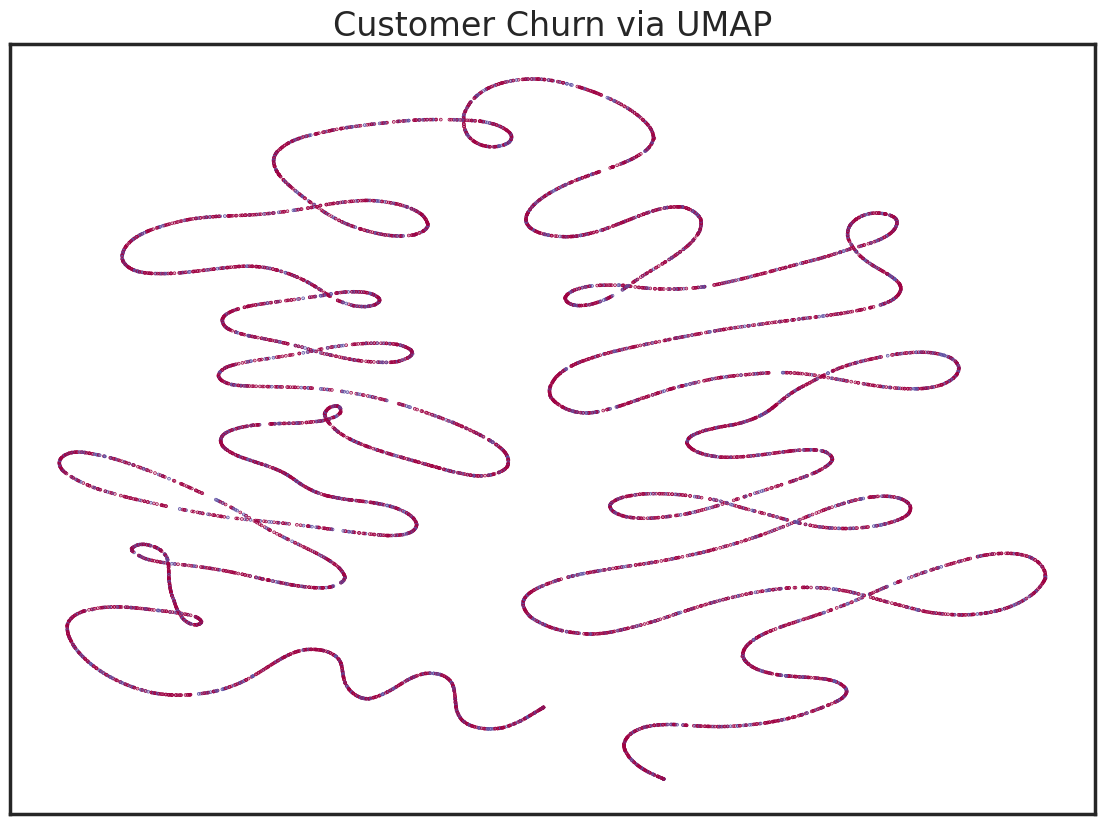

In [13]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
plt.title('Customer Churn via UMAP');

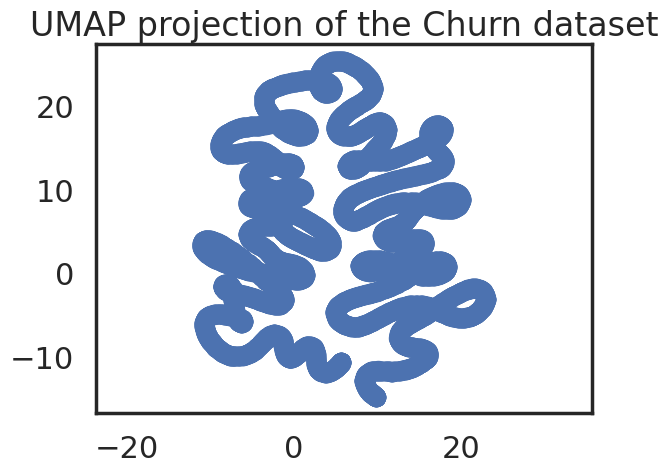

In [14]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Churn dataset', fontsize=24);
plt.show()

Text(0.5, 1.0, 'Data Distribution')

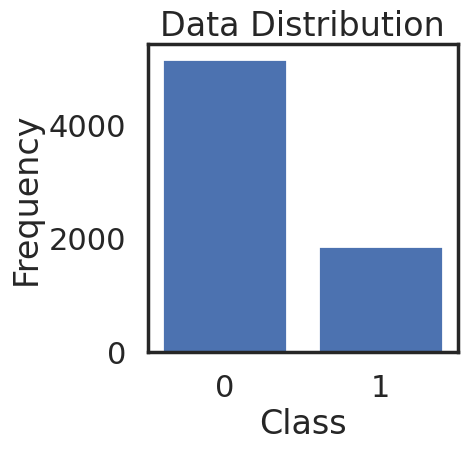

In [15]:
CLASSES, frequency = np.unique(target, return_counts=True)
fig = plt.figure(1, figsize=(4, 4))
plt.clf()
plt.bar(CLASSES, frequency)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data Distribution")


In [16]:
CLASSES

array([0, 1])

In [17]:
%%time
embedding = umap.UMAP(n_neighbors=10,min_dist=0.001,n_components=2).fit_transform(data, y=target)

CPU times: user 2min 39s, sys: 2min 35s, total: 5min 15s
Wall time: 1min 23s


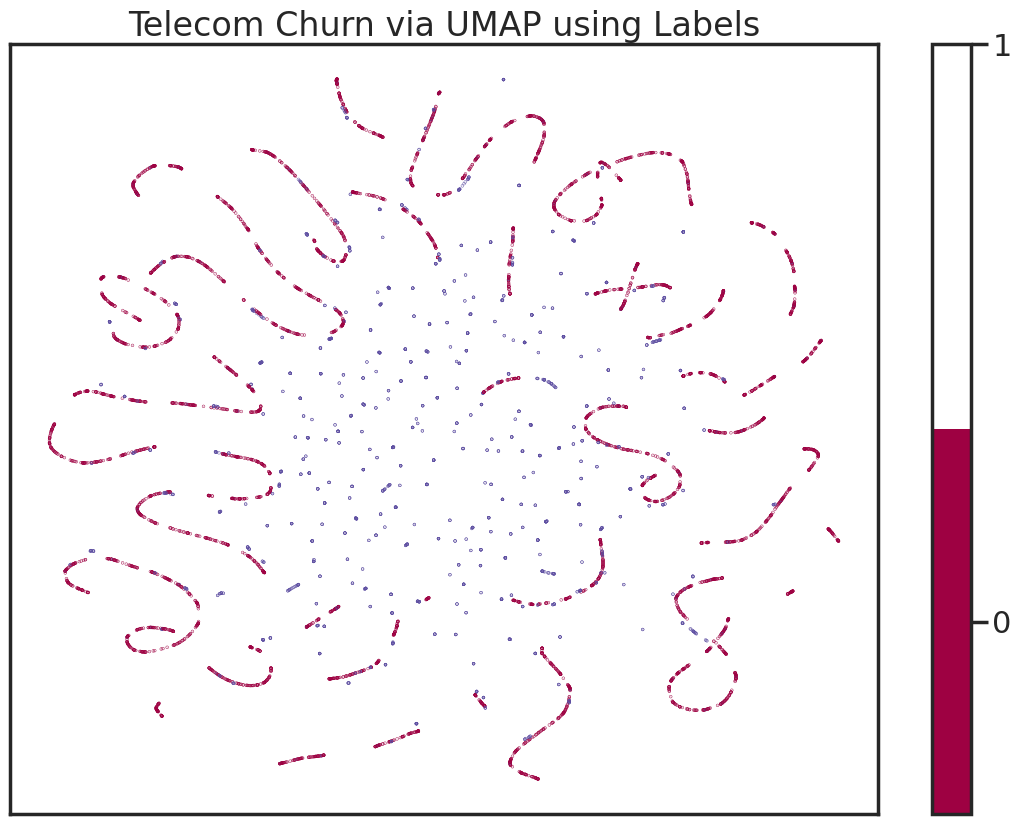

In [18]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(2)-0.5)
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(classes)
plt.title('Telecom Churn via UMAP using Labels');

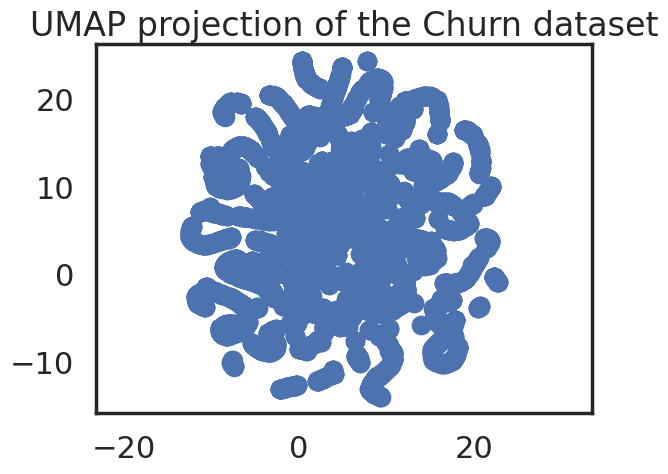

In [19]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Churn dataset', fontsize=24);
plt.show()

In [45]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples = 20)

In [46]:
clusters_dbscan=dbscan.fit_predict((embedding-embedding.mean())/embedding.std())

In [47]:
(values_dbscan,counts_dbscan) = np.unique(clusters_dbscan,return_counts=True)

In [48]:
for i in range(len(values_dbscan)):
    print('Cluster '+str(values_dbscan[i])+' counts: '+str(counts_dbscan[i]))

Cluster 0 counts: 6861
Cluster 1 counts: 26
Cluster 2 counts: 156


In [49]:
result_UMAP = pd.DataFrame(data = embedding , 
        columns = ['UMAP_1', 'UMAP_2'])
result_UMAP['DBSCAN_clusters']=clusters_dbscan+1
result_UMAP.head(10)

,UMAP_1,UMAP_2,DBSCAN_clusters
0,9.315002,-14.016256,1
1,9.315032,-14.016264,1
2,4.868311,-0.825700,1
3,9.309111,-14.013370,1
4,4.868335,-0.825683,1
5,4.868317,-0.825713,1
6,9.297016,-14.007644,1
7,9.293120,-14.005623,1
8,4.868322,-0.825625,1
9,9.277037,-13.998110,1


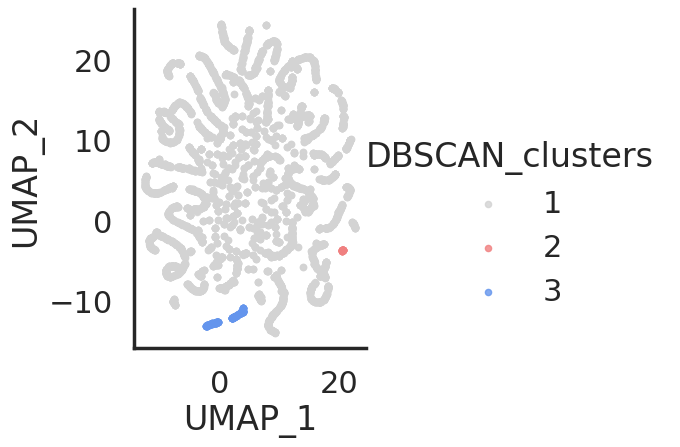

In [50]:
colors_set = ['lightgray','lightcoral','cornflowerblue','orange','mediumorchid', 'lightseagreen','olive', 'chocolate','steelblue']
customPalette_set = sns.set_palette(sns.color_palette(colors_set))

sns.lmplot( x="UMAP_1", y="UMAP_2",
  data=result_UMAP, 
  fit_reg=False, 
  legend=True,
  hue='DBSCAN_clusters', # color by cluster
  scatter_kws={"s": 20},palette=customPalette_set) # specify the point size
plt.show()